In [ ]:
#Using KMeans for outlier detection

In [2]:
from sklearn.datasets import make_blobs
X, labels = make_blobs(100, centers=1)
import numpy as np

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

KMeans(n_clusters=1)

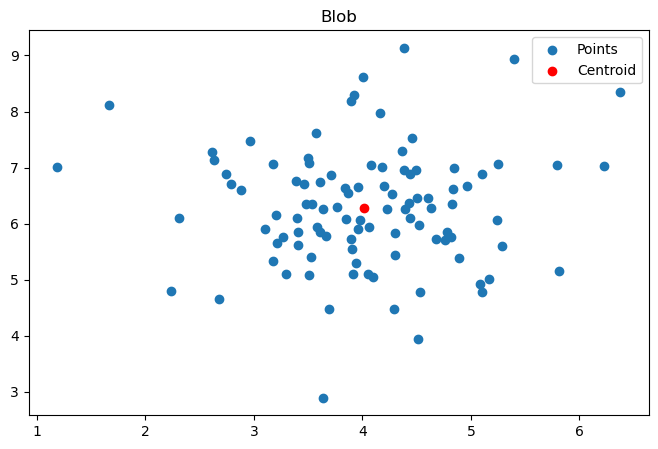

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Blob")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], label='Centroid',color='r')
ax.legend()

In [8]:
distances = kmeans.transform(X)

In [10]:
# argsort returns an array of indexes which will sort the array in ascending order
# so we reverse it via [::-1] and take the top five with [:5]
 
sorted_idx = np.argsort(distances.ravel())[::-1][:5] 

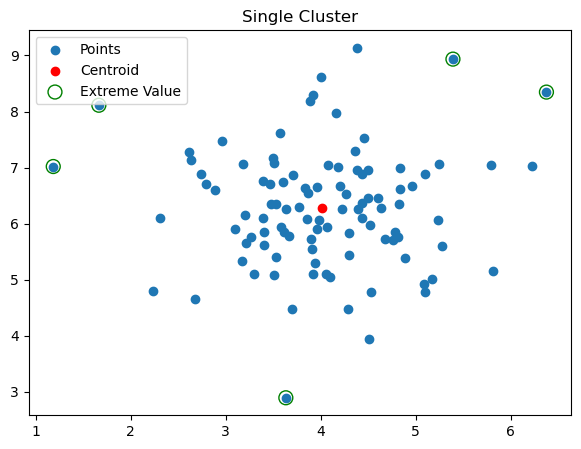

In [12]:
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],label='Extreme Value', edgecolors='g',facecolors='none', s=100)
ax.legend(loc='best')

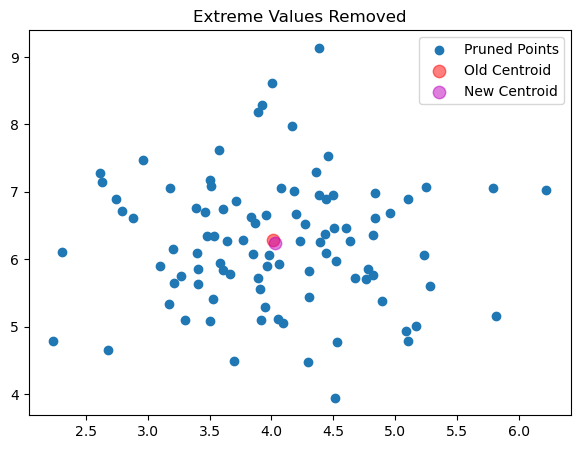

In [14]:
new_X = np.delete(X, sorted_idx, axis=0)
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], label='Old Centroid',color='r',s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:, 0],new_kmeans.cluster_centers_[:, 1], label='New Centroid',color='m', s=80, alpha=.5)
ax.legend(loc='best')

In [16]:
from scipy import stats
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel())
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5]
np.all(X[sorted_idx] == X[lowest_prob_idx])    

True